In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
# linear Regression

In [4]:
import statsmodels.api as sm 

## Linear Regression

$ Y = \beta_0 + \beta_1 . X $



## Polinomial Regression

$ Y = \beta_0 + \beta_1 . X_1 + \beta_2 . X_2 + ... + \beta_p . X_p + \epsilon $

### Estimators & Prediction for multiple linear regression

$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 . x_1 + \hat{\beta}_2 . x_2 + ... + \hat{\beta}_p . x_p $

$ RSS = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 $

$ = \sum\limits_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 . x_{i1} - \hat{\beta}_2 . x_{i2} - ... - \hat{\beta}_p . x_{ip}) $

### Hipothesis Test

$ H_0:\beta_0=\beta_2=...\beta_p=0 $

$ H_1 at least \beta_j \neq 0 $

## Statistics Using

$ F = \frac{(TSS - RSS)/p}{RSS/(n - p - 1)} $

$ TTS = \sum\limits_{i=1}^n (y_i - \bar{y})^2 $

$ RSS = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 $

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
bikes = pd.read_csv("Documents/Github/linear_regresion/bikes.csv", index_col='datetime', parse_dates=True)
bikes.shape

(10886, 11)

In [8]:
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-05-19 12:00:00,2,0,0,1,27.06,31.060,36,0.0000,276,366,642
2012-11-13 11:00:00,4,0,1,1,13.12,15.150,70,16.9979,22,133,155
2011-11-01 11:00:00,4,0,1,1,18.86,22.725,63,7.0015,16,101,117
2011-08-02 03:00:00,3,0,1,1,27.06,31.060,74,12.9980,0,5,5
2012-07-17 12:00:00,3,0,1,2,36.90,40.910,35,0.0000,80,174,254
2011-11-19 23:00:00,4,0,0,1,15.58,19.695,62,15.0013,20,73,93
2011-10-05 03:00:00,4,0,1,1,18.86,22.725,82,7.0015,1,5,6
2012-03-09 23:00:00,1,0,1,1,13.12,15.150,33,19.9995,9,77,86
2012-08-18 03:00:00,3,0,0,1,25.42,28.030,88,12.9980,7,23,30


In [9]:
bikes.rename(columns={'count':'total'},inplace=True)

In [10]:
bikes.sample(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2012-07-05 11:00:00,3,0,1,1,36.90,40.910,35,19.9995,107,137,244
2011-12-16 02:00:00,4,0,1,1,19.68,23.485,77,7.0015,0,23,23
2012-12-14 19:00:00,4,0,1,1,13.94,17.425,53,6.0032,17,302,319
2012-04-08 10:00:00,2,0,0,1,20.50,24.240,25,15.0013,113,186,299


In [11]:
features_cols=['temp']
X=bikes[features_cols]
y=bikes['total']

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linreg=LinearRegression()

In [14]:
linreg.fit(X,y)

LinearRegression()

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616611
[9.17054048]


In [16]:
temp=25
linreg.intercept_+linreg.coef_*temp

array([235.309725])

In [17]:
test_sklearn=np.array(temp).reshape(-1,1)
linreg.predict(test_sklearn)

C:\Users\Work\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

In [18]:
feature_cols = ["temp","weather","humidity"]
bikes[features_cols].corr()

,temp
temp,1.0


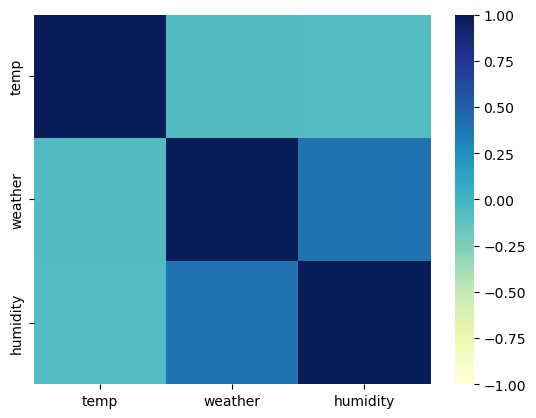

In [19]:
sns.heatmap(bikes[feature_cols].corr(),vmin=-1,vmax=1,center=0,cmap="YlGnBu");

In [20]:
X=bikes[feature_cols]
y=bikes.total

linreg.fit(X,y)

print(linreg.intercept_)
print(linreg.coef_)

183.23969390859932
[ 8.73698147  3.77938867 -2.80809402]


In [22]:
list(zip(feature_cols,linreg.coef_))

[('temp', 8.736981468839673),
 ('weather', 3.779388671757318),
 ('humidity', -2.808094023675352)]

In [23]:
from sklearn import metrics

In [25]:
true = [10,7,5,5,10,8,8,15,12]
pred = [12,8,3,4,12,9,8,12,13]

In [26]:
print("MAE:",metrics.mean_absolute_error(true,pred))
print("MSE:",metrics.mean_squared_error(true,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(true,pred)))
print("R2:",metrics.r2_score(true,pred))

MAE: 1.4444444444444444
MSE: 2.7777777777777777
RMSE: 1.6666666666666667
R2: 0.7054973821989529


In [27]:
from sklearn.model_selection import train_test_split

In [32]:
def train_test_error(feature_cols):
    X=bikes[feature_cols]
    y=bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False)
    linreg=LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred=linreg.predict(X_test)
    
    print(feature_cols)
    print("y_test sample: ", y_test.values[0:10])
    print("y_pred sample; ",y_pred[0:10].astype(int))
    print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
    print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ",metrics.r2_score(y_test,y_pred))
    print()
    return

In [33]:
train_test_error(['temp','humidity'])

['temp', 'humidity']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample;  [394 394 377 394 411 382 351 351 351 334]
MAE:  154.60330484672812
MSE:  44002.98797986697
RMSE:  209.76889183066913
R2:  0.059531235095285684



In [36]:
train_test_error(['temp','humidity','weather'])

['temp', 'humidity', 'weather']
y_test sample:  [420 444 345 313 413 370 382 332 258 151]
y_pred sample;  [394 394 377 394 411 382 351 351 351 334]
MAE:  154.64776877483334
MSE:  44017.31478932265
RMSE:  209.80303808411034
R2:  0.05922503050754324



## Bonus - Minimun Square Method

$ \hat{\beta}=(X^T X)^{-1}{X^T}_y $